In [18]:
from pathlib import Path
import pandas as pd
import json
from jackpot.utils.data import read_json
import seaborn as sns
import matplotlib.pyplot as plt

p = Path().resolve()


df = pd.DataFrame()
for experiment in (p / "experiments" / "autocorrelation").glob("*"):
    config = read_json(experiment / "config.json")
    ac_df = pd.read_feather(experiment / "ac_df.feather")
    ac_df["size"] = config["size"]
    ac_df["algorithm"] = config["algorithm"]

    df = pd.concat([df, ac_df])

<Axes: xlabel='temp', ylabel='magnetisation_density_decay_time'>

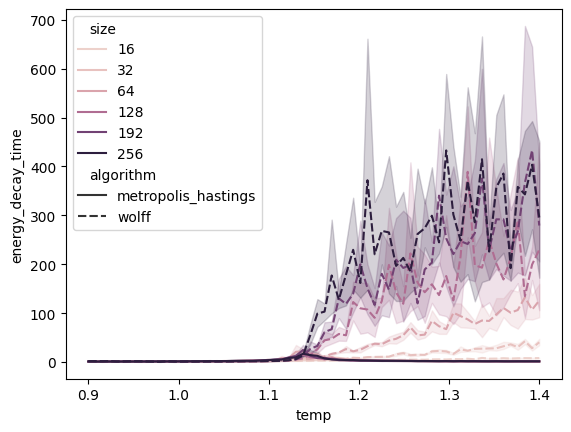

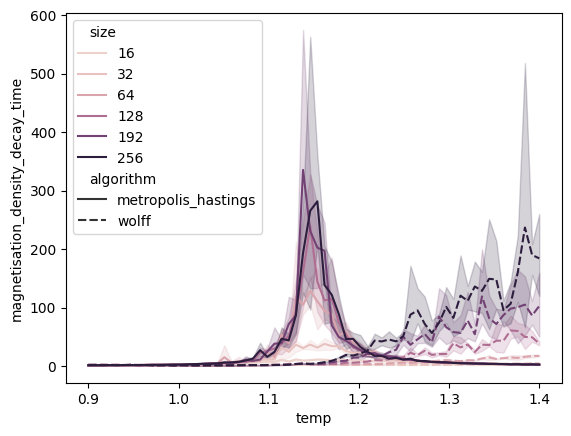

In [19]:
plt.figure()
sns.lineplot(data=df, x="temp", y="energy_decay_time", hue="size", style="algorithm")
plt.figure()
sns.lineplot(
    data=df,
    x="temp",
    y="magnetisation_density_decay_time",
    hue="size",
    style="algorithm",
)